In [1]:
import datasets

In [2]:
!pip list

Package                   Version
------------------------- -----------
aiohappyeyeballs          2.6.1
aiohttp                   3.12.7
aiosignal                 1.3.2
anyio                     4.7.0
appnope                   0.1.3
argon2-cffi               21.3.0
argon2-cffi-bindings      21.2.0
asttokens                 3.0.0
async-lru                 2.0.4
attrs                     25.3.0
babel                     2.16.0
beautifulsoup4            4.12.3
bleach                    6.2.0
Brotli                    1.0.9
certifi                   2025.4.26
cffi                      1.17.1
charset-normalizer        3.4.2
comm                      0.2.1
datasets                  3.6.0
debugpy                   1.8.11
decorator                 5.1.1
defusedxml                0.7.1
dill                      0.3.8
executing                 0.8.3
fastjsonschema            2.20.0
filelock                  3.18.0
frozenlist                1.6.2
fsspec                    2025.3.0
h11            

In [8]:
!ls paraphrases_mrpc/

paraphrases_mrpc_dup.jsonl.gz paraphrases_mrpc_nodup.jsonl


In [10]:
!gunzip paraphrases_mrpc/paraphrases_mrpc_nodup.jsonl.gz

gunzip: can't stat: paraphrases_mrpc/paraphrases_mrpc_nodup.jsonl.gz (paraphrases_mrpc/paraphrases_mrpc_nodup.jsonl.gz.gz): No such file or directory


In [37]:
ds = datasets.load_dataset('allegrolab/paraphrases_mrpc')

paraphrases_mrpc_dup.jsonl.gz:   0%|          | 0.00/511k [00:00<?, ?B/s]

paraphrases_mrpc_nodup.jsonl.gz:   0%|          | 0.00/487k [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

DatasetGenerationCastError: An error occurred while generating the dataset

All the data files must have the same columns, but at some point there are 1 new columns ({'meta'})

This happened while the json dataset builder was generating data using

/Users/nityakashyap/.cache/huggingface/hub/datasets--allegrolab--paraphrases_mrpc/snapshots/204c19ede2612cab03953d82e73bbf9074339d58/paraphrases_mrpc_nodup.jsonl.gz

Please either edit the data files to have matching columns, or separate them into different configurations (see docs at https://hf.co/docs/hub/datasets-manual-configuration#multiple-configurations)

In [ ]:
ds = datasets.load_dataset('json', data_files = 'paraphrases_mrpc/paraphrases_mrpc_nodup.jsonl')
ds

In [16]:
ds['train'][0]

{'text': '"The fire calmed down considerably overnight, then it rained," said Andy Lyon, spokesman for the Douglas County fire command center.',
 'meta': '{"sentence1": "\\" The fire calmed down considerably overnight , then it rained , \\" said Andy Lyon , spokesman for the fire south of the city .", "sentence2": "\\" The fire calmed down considerably overnight , then it rained , \\" said Andy Lyon , spokesman for the Douglas County fire command center .", "label": 1, "idx": 3495, "random_bit": 1, "detok_sentence1": "\\"The fire calmed down considerably overnight, then it rained,\\" said Andy Lyon, spokesman for the fire south of the city.", "detok_sentence2": "\\"The fire calmed down considerably overnight, then it rained,\\" said Andy Lyon, spokesman for the Douglas County fire command center.", "duplicates": 0}'}

In [17]:
ds['train'][0]['meta']

'{"sentence1": "\\" The fire calmed down considerably overnight , then it rained , \\" said Andy Lyon , spokesman for the fire south of the city .", "sentence2": "\\" The fire calmed down considerably overnight , then it rained , \\" said Andy Lyon , spokesman for the Douglas County fire command center .", "label": 1, "idx": 3495, "random_bit": 1, "detok_sentence1": "\\"The fire calmed down considerably overnight, then it rained,\\" said Andy Lyon, spokesman for the fire south of the city.", "detok_sentence2": "\\"The fire calmed down considerably overnight, then it rained,\\" said Andy Lyon, spokesman for the Douglas County fire command center.", "duplicates": 0}'

In [18]:
import pandas as pd

In [19]:
df = ds.to_pandas()

AttributeError: 'DatasetDict' object has no attribute 'to_pandas'

In [23]:
dset = datasets.load_dataset("nyu-mll/glue", "cola")

README.md:   0%|          | 0.00/35.3k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/251k [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/37.6k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/37.7k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/8551 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1043 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1063 [00:00<?, ? examples/s]

In [36]:
dset['train'][-1]

{'sentence': 'What all did you get for Christmas?', 'label': 1, 'idx': 8550}

In [45]:
!pip install seaborn

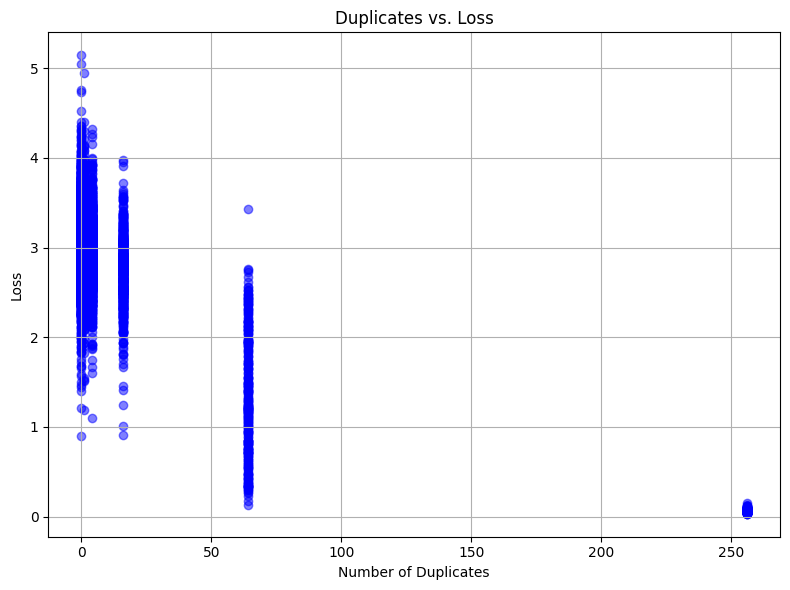

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("model_outputs_1b_100b_toks.csv")

plt.figure(figsize=(8, 6))
plt.scatter(df["duplicates"], df["loss"], color="blue", alpha=0.5)
plt.xlabel("Number of Duplicates")
plt.ylabel("Loss")
plt.title("Duplicates vs. Loss")
plt.grid(True)
plt.tight_layout()
plt.show()

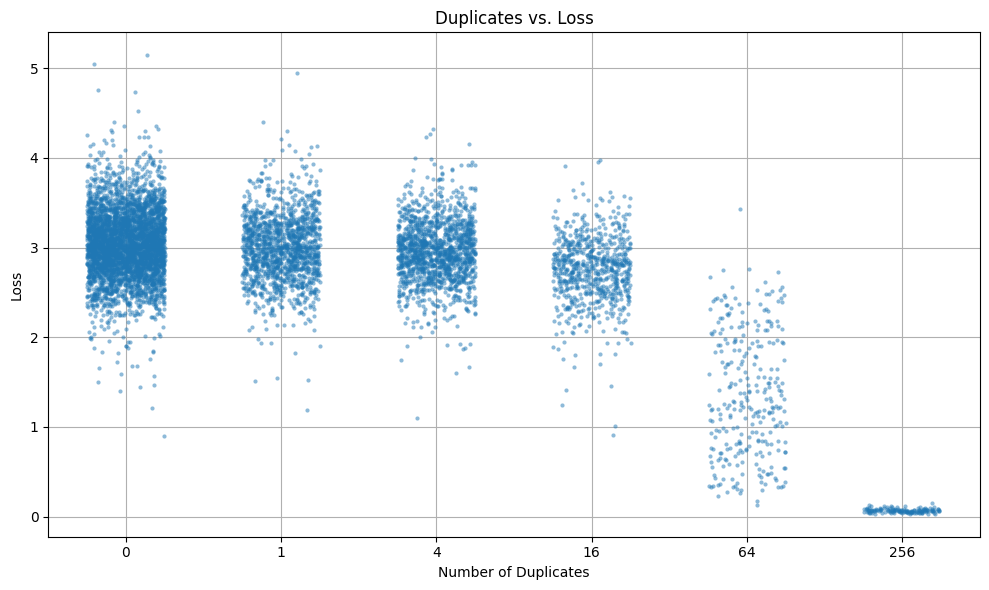

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.stripplot(data=df, x="duplicates", y="loss", jitter=0.25, alpha=0.5, size=3)

plt.title("Duplicates vs. Loss")
plt.xlabel("Number of Duplicates")
plt.ylabel("Loss")
plt.grid(True)
plt.tight_layout()
plt.show()

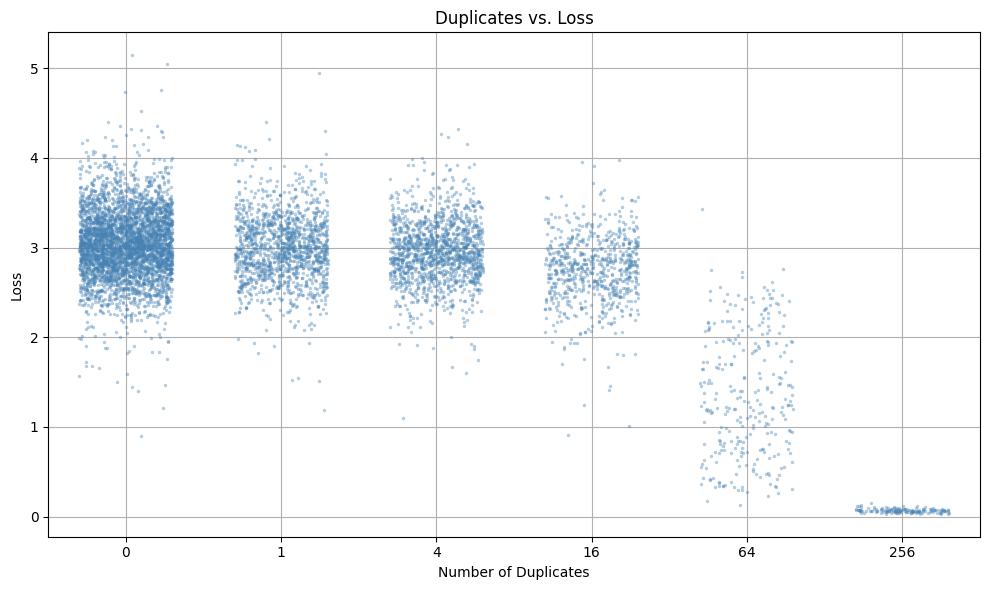

In [49]:
# Forcing duplicates to be ordered categorically to get better horizontal jittering 
bins = [0, 1, 4, 16, 64, 256]
df["dup_bin"] = pd.Categorical(df["duplicates"], categories=bins, ordered=True)

plt.figure(figsize=(10, 6))
sns.stripplot(
    data=df,
    x="dup_bin",
    y="loss",
    jitter=0.3,          # increase jitter for better spread
    alpha=0.4,           # transparency- helps make density clearer
    size=2.5,            # smaller points
    color="steelblue"    # custom dot color
)

plt.title("Duplicates vs. Loss")
plt.xlabel("Number of Duplicates")
plt.ylabel("Loss")
plt.grid(True)
plt.tight_layout()
# plt.savefig("dups_vs_loss_strip_binned.png")
plt.show()

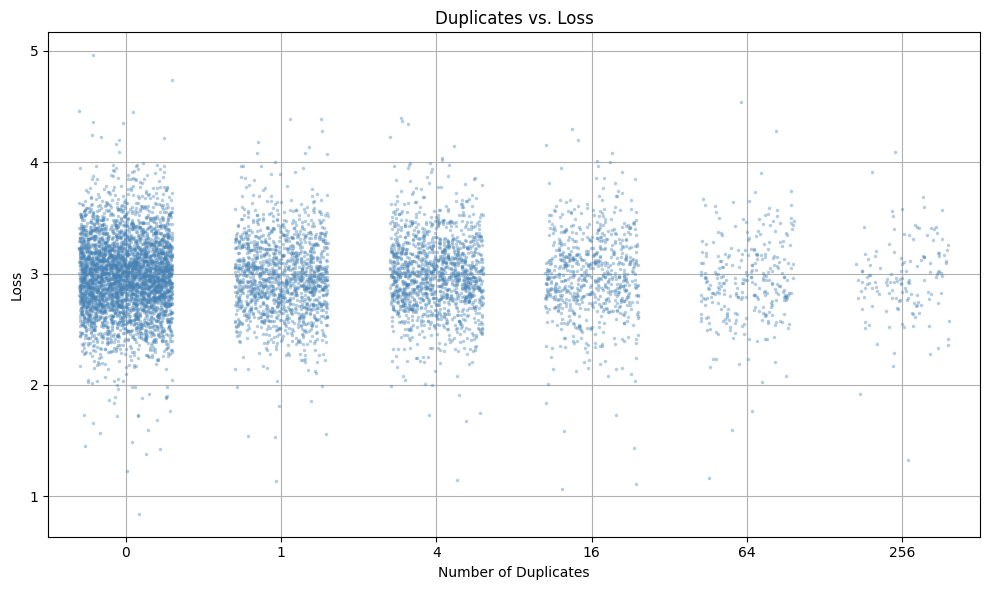

In [50]:
# Forcing duplicates to be ordered categorically to get better horizontal jittering 
bins = [0, 1, 4, 16, 64, 256]

df = pd.read_csv("model_outputs_1b_100b_toks_std.csv")
df["dup_bin"] = pd.Categorical(df["duplicates"], categories=bins, ordered=True)

plt.figure(figsize=(10, 6))
sns.stripplot(
    data=df,
    x="dup_bin",
    y="loss",
    jitter=0.3,          # increase jitter for better spread
    alpha=0.4,           # transparency- helps make density clearer
    size=2.5,            # smaller points
    color="steelblue"    # custom dot color
)

plt.title("Duplicates vs. Loss")
plt.xlabel("Number of Duplicates")
plt.ylabel("Loss")
plt.grid(True)
plt.tight_layout()
# plt.savefig("dups_vs_loss_strip_binned.png")
plt.show()

let's do all 4 of the 1B param models in a grid for easy visual comparison:

AttributeError: Line2D.set() got an unexpected keyword argument 'jitter'

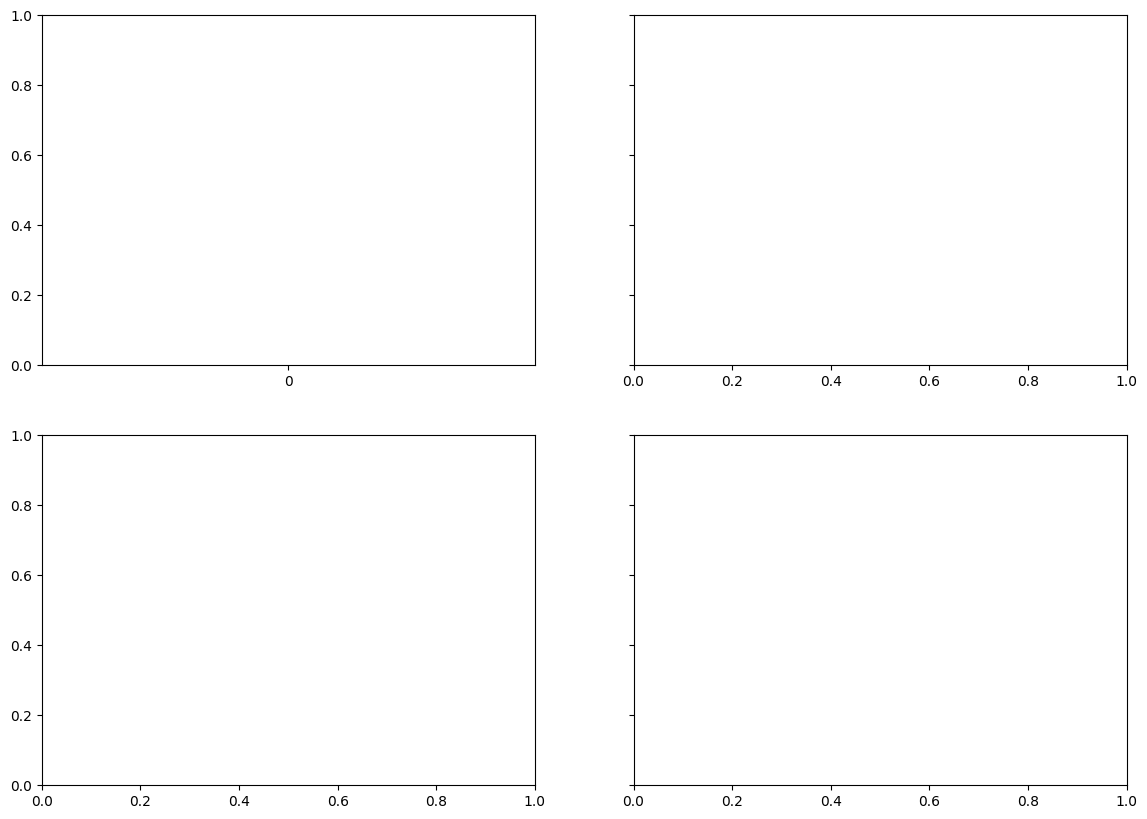

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


models = ["1b"] # 8B not yet uploaded
tokens = ["100b", "500b"]
conditions = ["std", "pet"]
duplicate_bins = [0, 1, 4, 16, 64, 256]

fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharey=True)
axs = axs.flatten()

for i, (m, t, c) in enumerate([(m, t, c) for m in models for t in tokens for c in conditions]):
    filename = f"model_outputs_{m}_{t}_toks_{c}.csv"
    
    if not os.path.exists(filename):
        print(f"Skipping missing file: {filename}")
        continue

    df = pd.read_csv(filename)

    df["dup_bin"] = pd.Categorical(df["duplicates"], categories=duplicate_bins, ordered=True)

    sns.stripplot(
        data=df,
        x="dup_bin",
        y="loss",
        ax=axs[i],
        jitter=0.3,
        alpha=0.4,
        size=2.5,
        color="steelblue"
    )

    axs[i].set_title(f"{m} | {t} | {c}")
    axs[i].set_xlabel("Number of Duplicates")
    if i % 2 == 0:
        axs[i].set_ylabel("Loss")
    else:
        axs[i].set_ylabel("")

    axs[i].grid(True)

fig.suptitle("Duplicates vs. Loss", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
# plt.savefig("num_dups_vs_loss_stripgrid_1B.png")
plt.show()

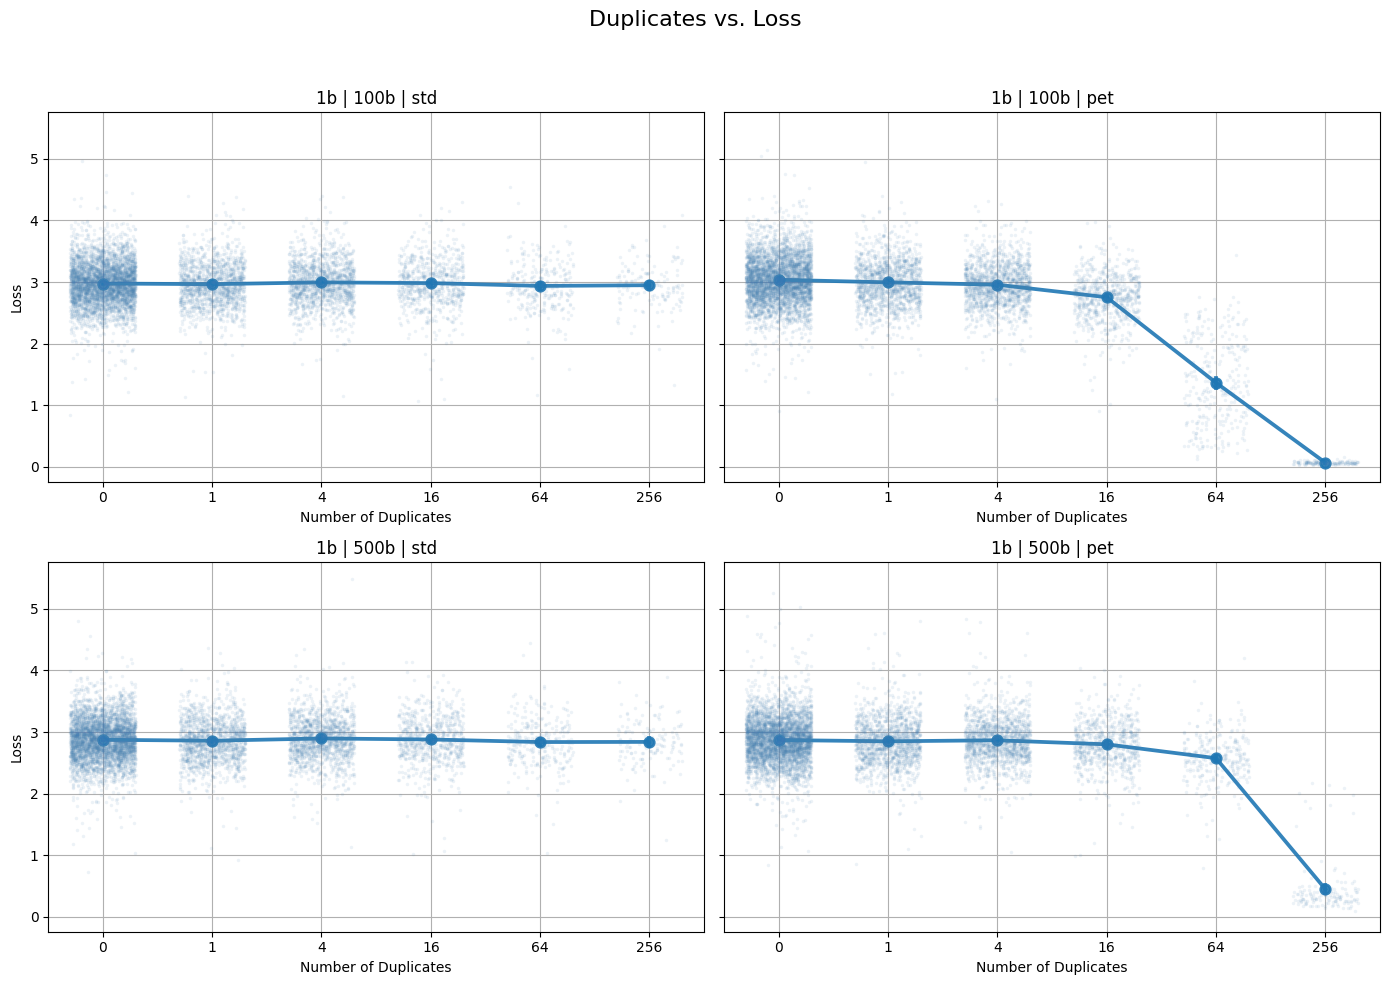

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


models = ["1b"] # 8B not yet uploaded
tokens = ["100b", "500b"]
conditions = ["std", "pet"]
duplicate_bins = [0, 1, 4, 16, 64, 256]

fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharey=True)
axs = axs.flatten()

for i, (m, t, c) in enumerate([(m, t, c) for m in models for t in tokens for c in conditions]):
    filename = f"model_outputs_{m}_{t}_toks_{c}.csv"
    
    if not os.path.exists(filename):
        print(f"Skipping missing file: {filename}")
        continue

    df = pd.read_csv(filename)

    df["dup_bin"] = pd.Categorical(df["duplicates"], categories=duplicate_bins, ordered=True)

    sns.pointplot(
        data=df,
        x="dup_bin",
        y="loss",
        errorbar=('ci', 95),
        ax=axs[i],
        alpha=0.9,
    )

    sns.stripplot(
        data=df,
        x="dup_bin",
        y="loss",
        ax=axs[i],
        jitter=0.3,
        alpha=0.1,
        size=2.5,
        color="steelblue"
    )
    
    axs[i].set_title(f"{m} | {t} | {c}")
    axs[i].set_xlabel("Number of Duplicates")
    if i % 2 == 0:
        axs[i].set_ylabel("Loss")
    else:
        axs[i].set_ylabel("")

    axs[i].grid(True)

fig.suptitle("Duplicates vs. Loss", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
# plt.savefig("num_dups_vs_loss_stripgrid_1B.png")
plt.show()

Skipping missing file: model_outputs_1b_100b_toks_std.csv
Skipping missing file: model_outputs_1b_100b_toks_pet.csv
Skipping missing file: model_outputs_1b_500b_toks_std.csv
Skipping missing file: model_outputs_1b_500b_toks_pet.csv
Skipping missing file: model_outputs_8b_100b_toks_std.csv
Skipping missing file: model_outputs_8b_100b_toks_pet.csv
Skipping missing file: model_outputs_8b_500b_toks_std.csv
Skipping missing file: model_outputs_8b_500b_toks_pet.csv


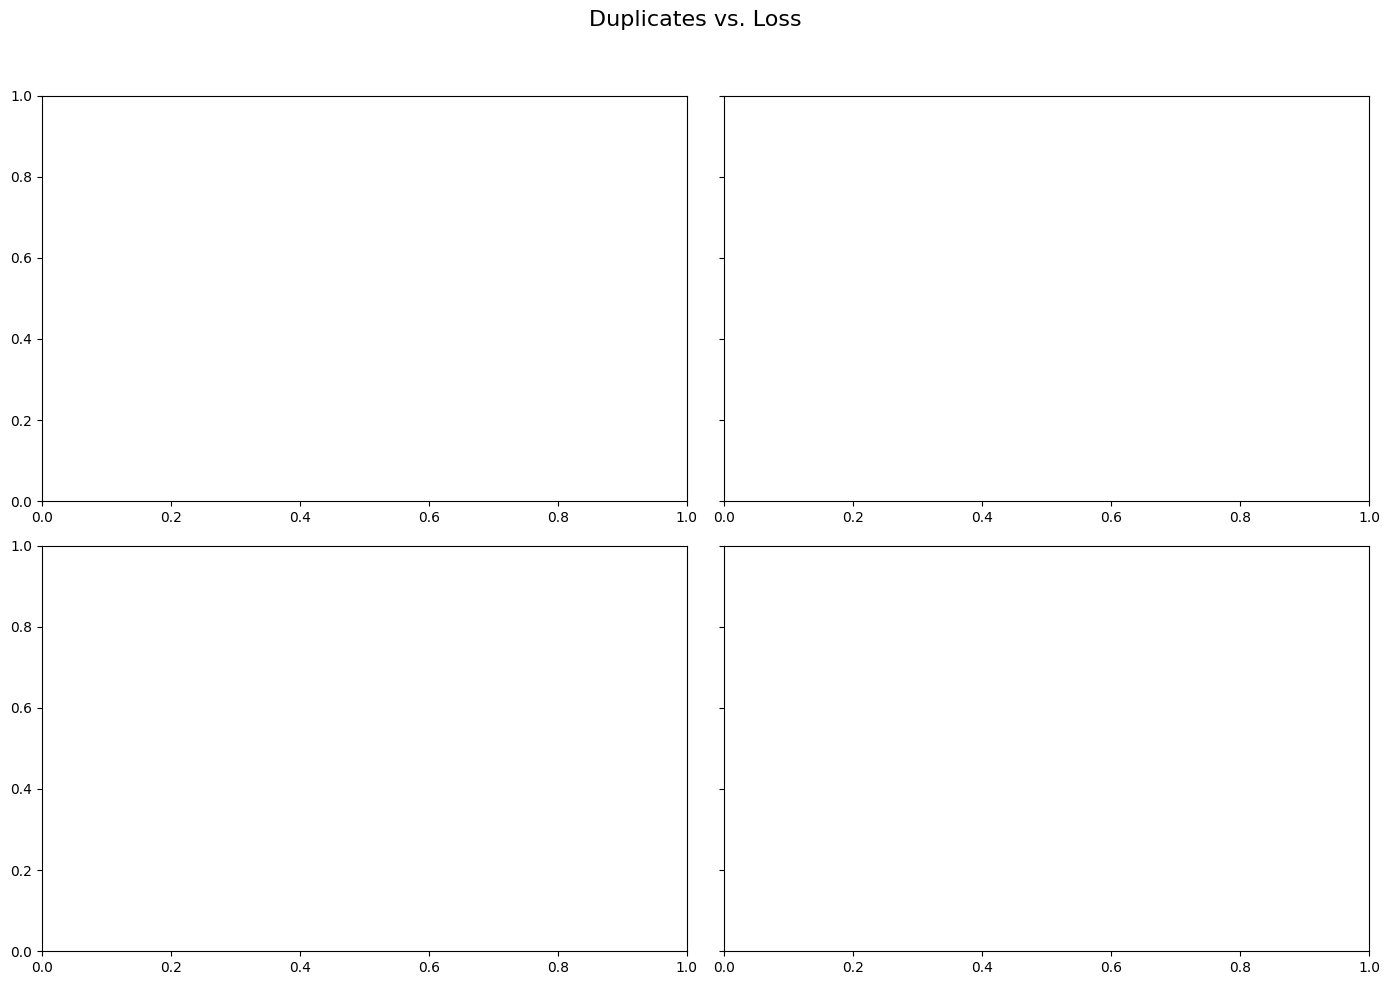

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


models = ["1b", "8b"] # 8B not yet uploaded
tokens = ["100b", "500b"]
conditions = ["std", "pet"]
duplicate_bins = [0, 1, 4, 16, 64, 256]

fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharey=True)
axs = axs.flatten()

for i, (m, t, c) in enumerate([(m, t, c) for m in models for t in tokens for c in conditions]):
    filename = f"model_outputs_{m}_{t}_toks_{c}.csv"
    
    if not os.path.exists(filename):
        print(f"Skipping missing file: {filename}")
        continue

    df = pd.read_csv(filename)

    df["dup_bin"] = pd.Categorical(df["duplicates"], categories=duplicate_bins, ordered=True)

    sns.pointplot(
        data=df,
        x="dup_bin",
        y="loss",
        errorbar=('ci', 95),
        ax=axs[0],
        alpha=0.9,
    )
    
    axs[i].set_title(f"{m} | {t} | {c}")
    axs[i].set_xlabel("Number of Duplicates")
    if i % 2 == 0:
        axs[i].set_ylabel("Loss")
    else:
        axs[i].set_ylabel("")

    axs[i].grid(True)

fig.suptitle("Duplicates vs. Loss", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
# plt.savefig("num_dups_vs_loss_stripgrid_1B.png")
plt.show()

In [5]:
!pip3 install pandas seaborn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 294 kB 3.1 MB/s eta 0:00:01
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.


../model_outputs/model_outputs_1b_100b_toks_std.csv
Skipping invalid filepath: ../model_outputs/model_outputs_1b_100b_toks_std.csv
../model_outputs/model_outputs_1b_100b_toks_pet.csv
../model_outputs/model_outputs_1b_500b_toks_std.csv
Skipping invalid filepath: ../model_outputs/model_outputs_1b_500b_toks_std.csv
../model_outputs/model_outputs_1b_500b_toks_pet.csv
Skipping invalid filepath: ../model_outputs/model_outputs_1b_500b_toks_pet.csv
../model_outputs/model_outputs_8b_100b_toks_std.csv
Skipping invalid filepath: ../model_outputs/model_outputs_8b_100b_toks_std.csv
../model_outputs/model_outputs_8b_100b_toks_pet.csv
../model_outputs/model_outputs_8b_500b_toks_std.csv
Skipping invalid filepath: ../model_outputs/model_outputs_8b_500b_toks_std.csv
../model_outputs/model_outputs_8b_500b_toks_pet.csv
Skipping invalid filepath: ../model_outputs/model_outputs_8b_500b_toks_pet.csv


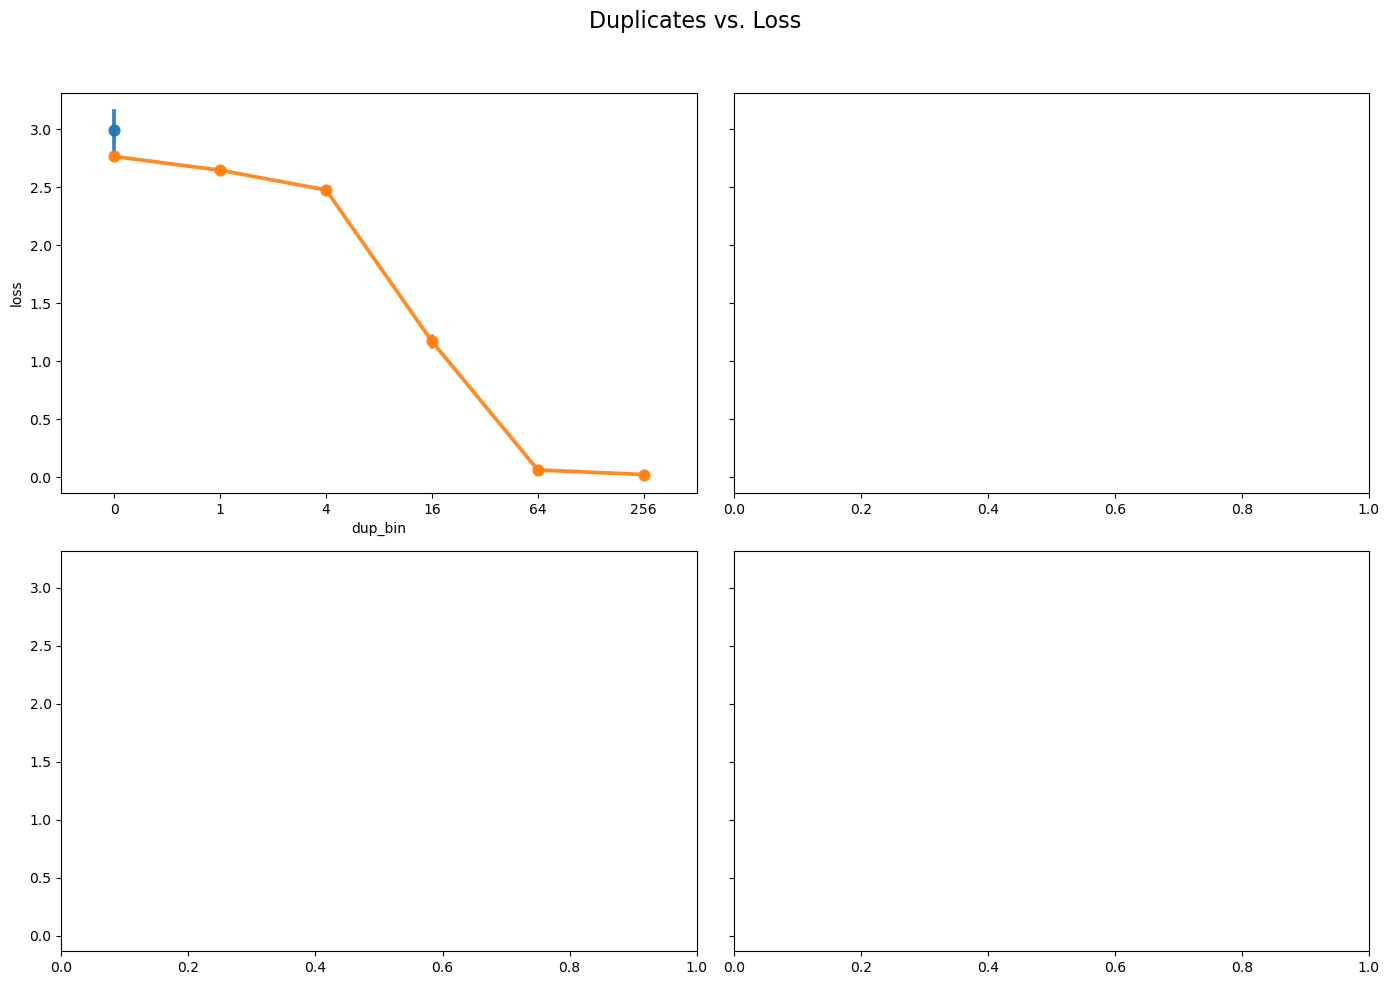

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


models = ["1b", "8b"] # 8B not yet uploaded
tokens = ["100b", "500b"]
conditions = ["std", "pet"]
duplicate_bins = [0, 1, 4, 16, 64, 256]

fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharey=True)
axs = axs.flatten()

for i, (m, t, c) in enumerate([(m, t, c) for m in models for t in tokens for c in conditions]):
    filepath = os.path.expanduser(f"../model_outputs/model_outputs_{m}_{t}_toks_{c}.csv")
    print(filepath)
    
    if not os.path.exists(filepath):
        print(f"Skipping invalid filepath: {filepath}")
        continue

    df = pd.read_csv(filepath)

    df["dup_bin"] = pd.Categorical(df["duplicates"], categories=duplicate_bins, ordered=True)

    sns.pointplot(
        data=df,
        x="dup_bin",
        y="loss",
        errorbar=('ci', 95),
        ax=axs[0],
        alpha=0.9,
    )
    
    # axs[i].set_title(f"{m} | {t} | {c}")
    # axs[i].set_xlabel("Number of Duplicates")
    # if i % 2 == 0:
    #     axs[i].set_ylabel("Loss")
    # else:
    #     axs[i].set_ylabel("")

    # axs[i].grid(True)

fig.suptitle("Duplicates vs. Loss", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
# plt.savefig("num_dups_vs_loss_stripgrid_1B.png")
plt.show()

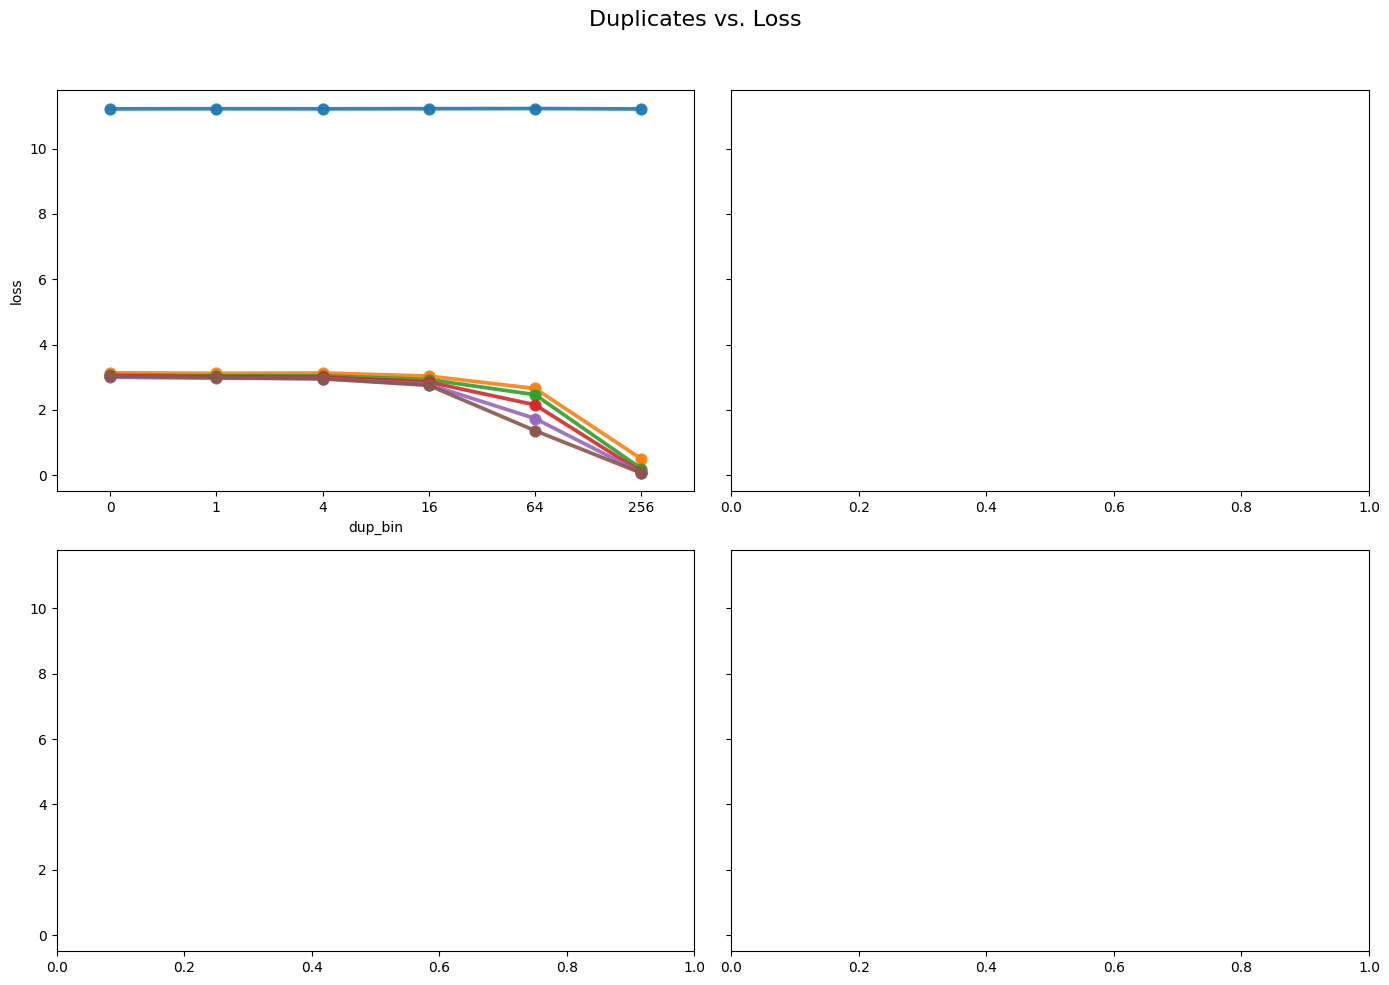

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


models = ["1b"] 
tokens = ["100b"]
conditions = ["pet"]
revisions = ["step0", "step16000", "step24000", "step32000", "step40000", "step48000"]
duplicate_bins = [0, 1, 4, 16, 64, 256]

fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharey=True)
axs = axs.flatten()

for i, (m, t, c, r) in enumerate([(m, t, c, r) for m in models for t in tokens for c in conditions for r in revisions]):
    filepath = f"usc_nlp_research/model_outputs/model_outputs_{m}_{t}_toks_{c}_{r}.csv"
    
    if not os.path.exists(filepath):
        print(f"Skipping invalid filepath: {filepath}")
        continue

    df = pd.read_csv(filepath)

    df["dup_bin"] = pd.Categorical(df["duplicates"], categories=duplicate_bins, ordered=True)

    sns.pointplot(
        data=df,
        x="dup_bin",
        y="loss",
        errorbar=('ci', 95),
        ax=axs[0],
        alpha=0.9,
    )
    

fig.suptitle("Duplicates vs. Loss", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
# plt.savefig("num_dups_vs_loss_stripgrid_1B.png")
plt.show()
